In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### Regression Example

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn import tree
from sklearn.externals.six import StringIO
import pydot

# Build the tree
data = load_boston()
clf = DecisionTreeRegressor(max_depth=3)
X = data.data
y = data.target
clf.fit(X,y)

# Visualize
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, 
                     feature_names=data.feature_names)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('boston_tree.pdf')

True

### Accuracy

#### Regression Tree

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

# Load Boston data
data = load_boston()

# Split into test/train
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, 
                                                    test_size=.33,
                                                    random_state=0)

# Parameter Search                                                    
model = DecisionTreeRegressor()
depth_parm = np.linspace(1,12,12)
num_samples_parm = np.linspace(5,100,20)
parameters = {'max_depth' : depth_parm,
             'min_samples_leaf' : num_samples_parm}
regressor = GridSearchCV(model, parameters, scoring = 'mean_squared_error', cv=10)
regressor.fit(X_train,y_train)

                                                    
# Test Prediction
pred = regressor.predict(X_test)
mse = np.mean((y_test - pred)**2)
print mse


22.3286112218


#### Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split

# Load Boston data
data = load_boston()

# Split into test/train
X_train, X_test, y_train, y_test = train_test_split(data.data, 
                                                    data.target, 
                                                    test_size=.33,
                                                    random_state=0)

# Train and fit model                                                   
rf = RandomForestRegressor(n_estimators=1000,
                                  max_features='auto',
                                  oob_score=True,
                                  random_state=0)
rf.fit(X_train,y_train)

                                                    
# Test Prediction
pred = rf.predict(X_test)
mse = np.mean((y_test - pred)**2)
mse

13.921620482395273

37% reduction in MSE

### Random Forest Interpretation

#### Mean Decrease Impurity

/Users/zach/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


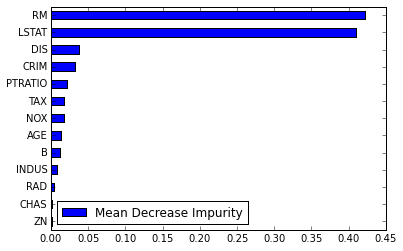

In [14]:
import numpy as np
import pandas as pd


# Plot the feature importance
feat_scores = pd.DataFrame({'Mean Decrease Impurity' : rf.feature_importances_},
                           index=data.feature_names)
feat_scores = feat_scores.sort('Mean Decrease Impurity')
feat_scores.plot(kind='barh')

#### Mean Decrease Accuracy

/Users/zach/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


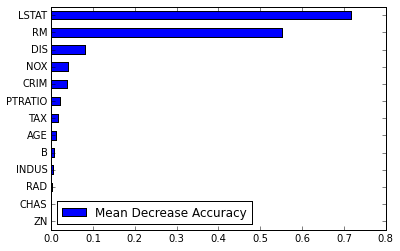

In [15]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict

 
boston = load_boston()   
names = boston.feature_names
X = boston["data"]
Y = boston["target"]
 
rf = RandomForestRegressor()
scores = defaultdict(list)
 
# crossvalidate the scores on a number of 
# different random splits of the data
for train_idx, test_idx in ShuffleSplit(len(X), 100, .3):
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = Y[train_idx], Y[test_idx]
    r = rf.fit(X_train, Y_train)
    acc = r2_score(Y_test, rf.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(Y_test, rf.predict(X_t))
        scores[names[i]].append((acc-shuff_acc)/acc)

score_series = pd.DataFrame(scores).mean()
scores = pd.DataFrame({'Mean Decrease Accuracy' : score_series})
scores.sort('Mean Decrease Accuracy').plot(kind='barh')

## Decision Paths

In [16]:
from treeinterpreter import treeinterpreter as ti

# Get feature contributions
prediction, bias, contributions = ti.predict(rf,X_test)
df_contrib = pd.DataFrame(contributions, columns=data.feature_names)
df_contrib['bias'] = bias
df_contrib['prediction'] = prediction

#### Scatterplot of RM vs LSTAT

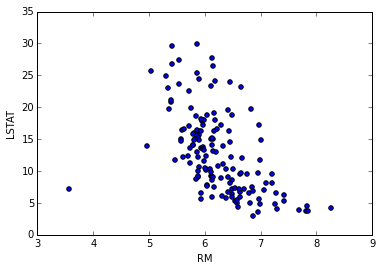

In [18]:
# Plot actual values for top two variables
df = pd.DataFrame(X_test, columns = data.feature_names)
df.plot('RM','LSTAT', kind='scatter')

#### Scatterplot of _contributions_ from RM vs LSTAT

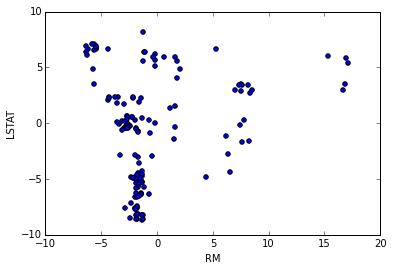

In [20]:
# Plot feature contributions for top two variables
df_contrib.plot('RM','LSTAT', kind='scatter')